 
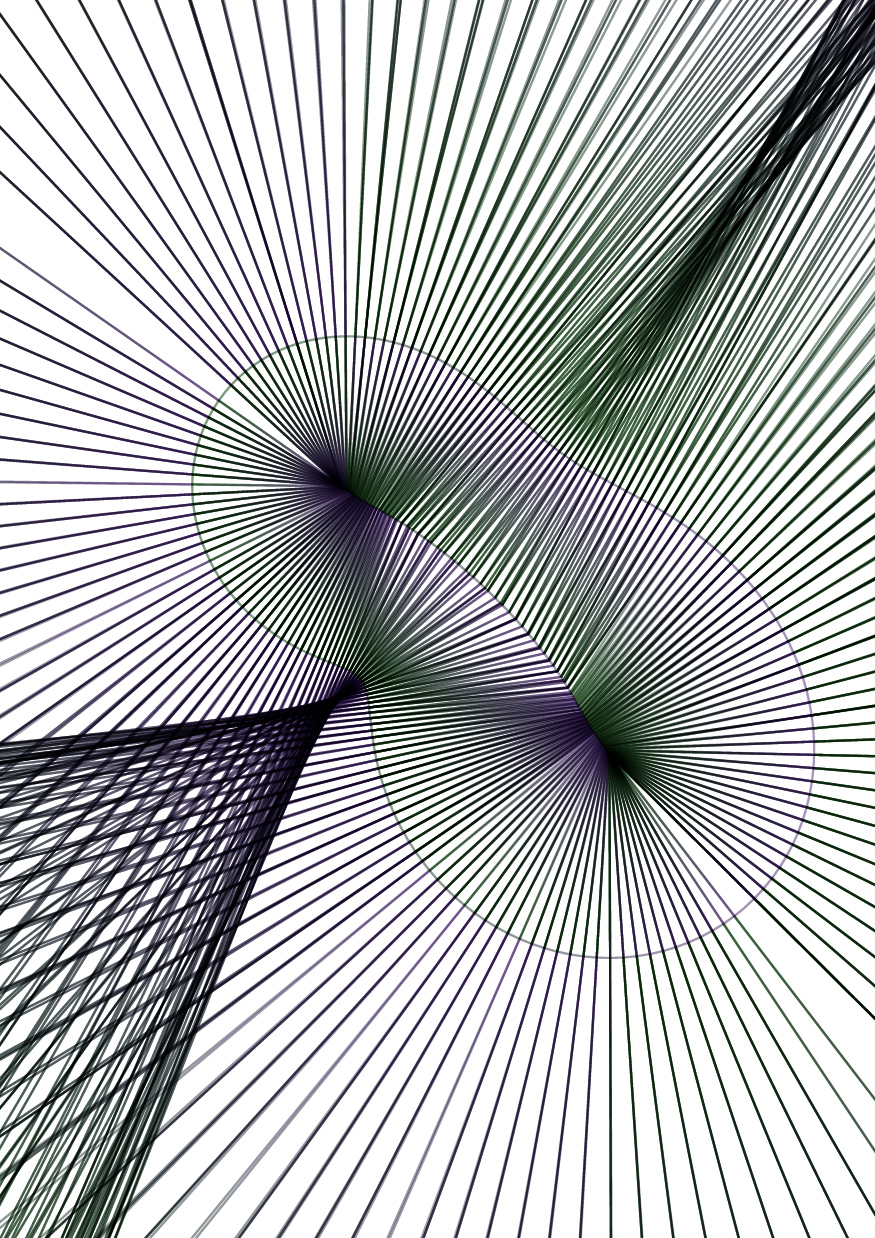

# Making Biological Shapes 

**Sohyun Jun**

This project explores how computational methods, specifically the medial axis transform, can be used to generate and reflect on biological form through practice-led artistic coding. 

## Introduction

This python project using py5canvas investigates the generation of biologically inspired shapes through computational geometry, focusing on the medial axis as both a mathematical structure and a conceptual metaphor. Drawing on theories of biological form and non-human intelligence, the project combines artistic experimentation with algorithmic processes to recreate organic shapes and explore how computational systems can model, interpret, and learn from natural forms.

## Concept and Background Research

Technology has privileged humans, creating a binary division between humans and non-humans and serving the interests of capital accumulation while often disregarding harmful consequences. However, rather than blaming technology itself for ecological issues, art that actively embraces technology can become a powerful medium for criticising human actions and encouraging positive changes in thinking and behaviour. This perspective underpins my overall artistic practice, and I wanted to extend this context into this module’s research project.

How can computers generate biological shapes? How do we define biological shapes? How can we understand nature’s reasoning? Blum (1973) explains that shapes in nature tend to have smooth boundaries and coherent curvature patterns, which are well captured by the medial axis transform. He suggests that a biological shape requires a boundary that is closed and smooth. These smooth boundaries meet circles at tangents, and the medial axis consists of the centres of these circles.

#### What is Medial Axis?

Imagine a shape made of grass. The medial axis is like the spine or skeleton of that shape. If you imagine a fire starting at the boundary and spreading inwards at a constant speed, the medial axis is formed where the fire fronts meet.

The Medial Axis Transform (MAT) has been used explicitly for motion and path planning through free space, particularly to find high-clearance routes and handle narrow passages in robotics motion planning. Chang, Saha, Prinz, Latombe, and Pinilla (2004) show how the medial axis transform assists robot motion planning by dilating free space and constructing efficient paths through narrow passages.

The medial axis is also used in computer vision and image analysis. It provides compact, topology-preserving skeletons useful for object recognition and shape description from binary images or point cloud data (Fisher et al., University of Edinburgh).

Moreover, the medial axis can be applied in medical imaging and biology. Recent medical imaging research uses medial axis reconstruction to extract vessel centrelines from segmented image data, enabling geometric analysis and downstream measurements (Fontana & Cappetti, 2024).

#### Conceptual and Theoretical Thinking

Regardless of understanding mathematical formulas or diagrams, most people intuitively recognise that biological shapes are generally round and smooth, and often symmetrical, even if not perfectly so. I began to question why organic creatures tend to maintain these kinds of forms, and what kinds of decisions or processes might underlie them.

Bridle (2022) suggests that non-human intelligence, such as slime mould, challenges conventional ideas of reasoning. For example, experiments with the slime mould _Physarum polycephalum_ have shown that it can develop efficient network configurations that replicate the Tokyo rail system within a short period.

There are many things humans do not yet understand, and we are only beginning to recognise “others” that have existed even before human beings. Recognising non-human intelligence and learning from how these entities perceive and respond to the world may allow us to co-inhabit this planet in a more equitable way.

In conclusion, I aimed to recreate shapes inspired by biological and organic shapes in Python using the medial axis to explore my artistic preferences, and then potentially produce printed drawings using a plotter machine as a final outcome.



## Technical Implementation

To start, I aimed to re-create this shape (Figure 1) as much as possible.

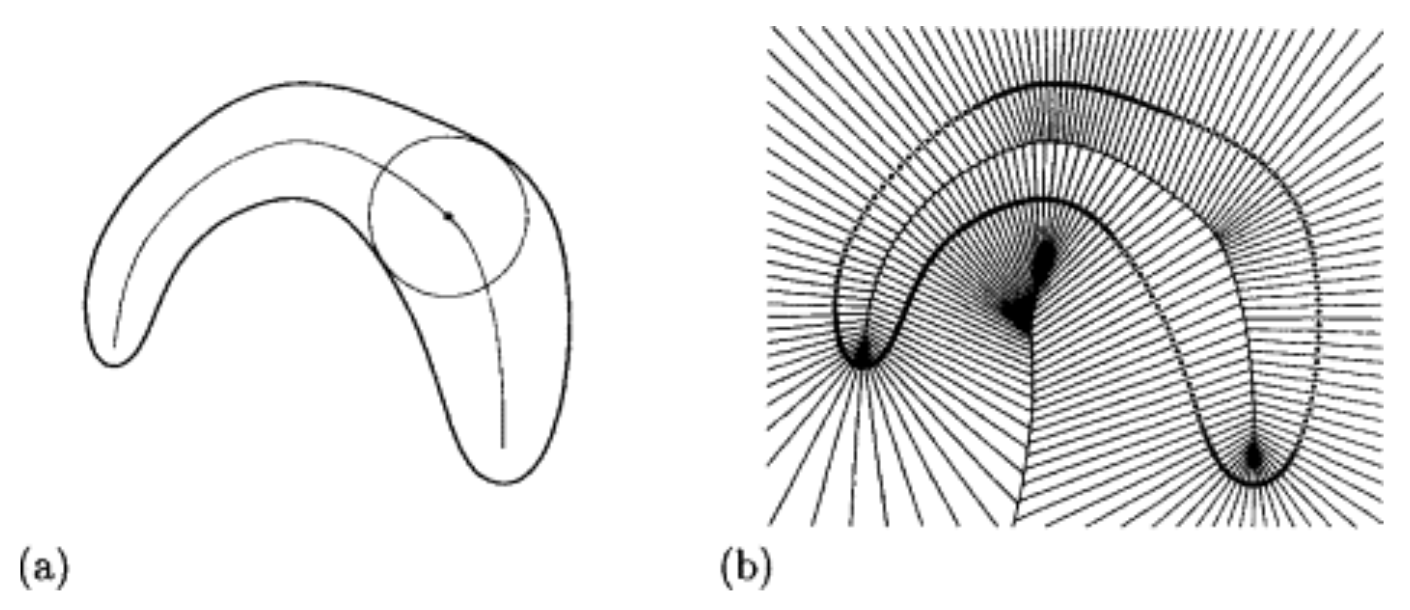
_Figure 1. Description of the medial axis within a shape (ScienceDirect, 2025).

To create this shape, I developed the following plan:
1. Draw a shape (boundary).

2. Generate lines from the boundary inwards, maintaining the normal direction at each point.

3. Draw a line along the locations where these inward lines meet at the centre.

4. Using the data from step 2, potentially draw outward lines as well.

### Check where you are running python

I had a issue installing modules in different environments. I practice myself to check whenever I run the codes.

In [447]:
import sys
print(sys.executable)
print(sys.version)

/Users/sohyunjun/miniforge3/envs/py5/bin/python
3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:46:25) [Clang 18.1.8 ]


Next, the required modules were installed. The purpose and usage of each module are explained later in this document.
```
conda install py5canvas numpy scipy shapely datetime
```

### Main Code

Import dependencies.

In [448]:
from py5canvas import *

In [449]:
import numpy as np
from scipy.spatial import Voronoi
from shapely.geometry import Polygon, Point

AI disclaimer: Firstly, I asked ChatGPT how to generate round shapes using NumPy, and it provided an initial code example. Below is the original code before I introduced additional parameters.

<details>
<summary>See original Code</summary>

```python
def sample_biological_shape(n=400, radius=220):
    t = np.linspace(0, 2*np.pi, n, endpoint=False)

    # soft biological deformation
    r = radius * (
        0.75
        + 0.15 * np.sin(2*t)
        + 0.10 * np.cos(3*t)
    )

    x = r * np.cos(t)
    y = r * np.sin(t)

    return np.column_stack([x, y])
```
</details>

As the project developed, I added parameters to provide greater control over different shape characteristics and to enable dynamic variation. These modifications were applied after the basic shape and medial axis generation were successfully done.

This was first time I was introduced to Numpy linespace. So I tried to understand what it is doing from [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

```python
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)
```

In the function below, <code>linespace</code> generates <code>n</code> evenly spaced values between <code>0</code> and <code>2 * np.pi</code>. These values are then used as angular inputs in a radial function, producing a smooth shape with continuous curvature.

In [450]:
# Boundary generation
def sample_biological_shape(
    n=100,  # number of boundary sample. (density)
    radius=220,  # overal scale of the shape
    base=0.55,  # base radius proportion
    sin_amp=0.15,  # amplitude of the sine deformation (controls the strength of large-scale lobes)
    sin_freq=2,  # frequency of the sine deformation (determines the number of major lobes)
    cos_amp=0.10,  # amplitude of the cosine deformation (adds secondary structure on top of the main lobes)
    cos_freq=3,  # frequency of the cosine deformation (Controls how many secondary features appear around the boundary)
    wobble_amp=0.0,  # amplitude of high-frequency noise (adds small-scale surface irregularities. like roughness!)
    wobble_freq=12,  # frequency of the wobble term (controls how fine the surface texture is)
    asymmetry=0.0,  # growth asymmetry along the boundary (higher values → bent or biased forms, breaking perfect symmetry)
):
    # sample angles around a circle
    t = np.linspace(0, 2 * np.pi, n, endpoint=False)

    # radial function defining the boundary shape
    r = radius * (
        base
        + sin_amp * np.sin(sin_freq * t)
        + cos_amp * np.cos(cos_freq * t)
        + wobble_amp * np.sin(wobble_freq * t)
        + asymmetry * (t / (2 * np.pi))
    )

    # convert polar coordinates to Cartesian
    x = r * np.cos(t)
    y = r * np.sin(t)

    return np.column_stack([x, y])


Using these boundary points, the medial axis was extracted using a Voronoi-based approach.

[Voronoi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html) from _Scipy_ is used to find the center of circles that touches input points, and generating skeleton which is represeted by the ridges.

Additionally, [Polygon](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html) and [Point](https://shapely.readthedocs.io/en/2.0.6/reference/shapely.Point.html) from _Shapely_ was used to remove unnecessary lines that extend beyond the boundary.

AI disclaimer: I asked ChatGPT how to compute the medial axis from boundary points and about the possibility of using Voronoi diagrams to identify points equidistant from the boundary, inspired by Blum’s grassfire theory.

In [451]:
# Medial axis extraction
def medial_axis(points, min_radius=20):
    # compute voronoi diagram of boundary samples that were created above
    vor = Voronoi(points)

    # polygon used to test if points lie inside the shape
    poly = Polygon(points)

    medial = []

    # iterate over voronoi ridges between boundary points
    for (i, j), verts in zip(vor.ridge_points, vor.ridge_vertices):
        if -1 in verts:
            continue # skip infinite ridges

        for v in verts:
            c = vor.vertices[v] # candidate medial point
            
            if not poly.contains(Point(c)):
                continue # ignore points outside the shape

            r = np.linalg.norm(c - vor.points[i])

            medial.append({
                "center": c,         # medial axis point
                "radius": r,         # local thickness
                "b1": vor.points[i], # boundary contact 1
                "b2": vor.points[j], # boundary contact 2
            })

    return medial


In [452]:
# Drawing skeleton
def order_medial_points(medial):
    # extract medial axis coordinates
    C = np.array([m["center"] for m in medial])

    # estimate main axis using PCA
    mean = C.mean(axis=0)
    U, S, Vt = np.linalg.svd(C - mean)
    direction = Vt[0]

    # project points onto main axis
    for m in medial:
        m["t"] = np.dot(m["center"] - mean, direction)

    medial_sorted = sorted(medial, key=lambda m: m["t"])
    # sort points along the axis
    return medial_sorted


The three functions below—<code>draw_boundary</code>, <code>draw_skeleton</code>, and <code>draw_radius_lines</code>—are the main drawing functions, and they use the data generated in the previous steps. If these functions are not executed, the code will still work, but just not drawing lines and points.

In [453]:
# Draw the outer contour of the shape
def draw_boundary(points):
    stroke(0)
    stroke_weight(2)
    no_fill()

    begin_shape()
    for x, y in points:
        vertex(x, y)
    end_shape(CLOSE)

In [454]:
# Draw medial axis as a continuous skeleton line
def draw_skeleton(medial):
    stroke(0)
    stroke_weight(2)
    no_fill()

    begin_shape()
    for m in medial:
        x, y = m["center"]
        vertex(x, y)
    end_shape()


In [455]:
is_coloured = True

# Draw radius lines from medial axis to boundary and beyond
def draw_radius_lines(medial, step=4, outward_length=180):
    stroke_weight(0.4)

    # subsample medial points to control line density
    for m in medial[::step]:
        c = m["center"]

        # each medial point has two boundary contacts
        for b in (m["b1"], m["b2"]):
            # vector from center to boundary
            v = b - c
            v_norm = v / np.linalg.norm(v)

            # inward (center → boundary)
            stroke(255, 0, 0) # red

            if is_coloured:
                stroke(255, 0, 0) # red
            else:
                stroke(0)
                
            stroke_weight(1.0)
            line(c[0], c[1], b[0], b[1])

            # outward (boundary → outside)
            out = b + v_norm * outward_length

            if is_coloured:
                stroke(0, 255, 0) # green
            else:
                stroke(0)

            stroke_weight(1.0)
            line(b[0], b[1], out[0], out[1])

            # debug
            stroke(0) # black
            stroke_weight(1.0)
            point(b[0], b[1]) # boundary points

            if is_coloured:
                stroke(0, 0, 255) # blue
            else:
                stroke(0)

            point(c[0], c[1]) # medial points

show()


From this point onward, the process involved primarily artistic decision-making. As described in the <code>sample_biological_shape</code> function, comments are included here again for convenience when adjusting and testing different shape variations through parameter changes.

- n: number of boundary sample. (density)
- radius: overal scale of the shape
- base: base radius proportion
- sin_amp: amplitude of the sine deformation (controls the strength of large-scale lobes) 
- sin_freq: frequency of the sine deformation (determines the number of major lobes)
- cos_amp: amplitude of the cosine deformation (adds secondary structure on top of the main lobes)
- cos_freq: frequency of the cosine deformation (Controls how many secondary features appear around the boundary)
- wobble_amp: amplitude of high-frequency noise (adds small-scale surface irregularities. like roughness!)
- wobble_freq: frequency of the wobble term (controls how fine the surface texture is)
- asymmetry: growth asymmetry along the boundary (higher values → bent or biased forms, breaking perfect symmetry)

In [456]:
SHAPES = {
    "potato": dict(
        n=200,
        radius=250,
        base=0.5,
        sin_amp=0.2,
        sin_freq=2,
        cos_amp=0.15,
        cos_freq=1,
        wobble_amp=0.0,
        asymmetry=0.0,
    ),
    "peanut": dict(
        n=100,
        radius=200,
        base=0.5,
        sin_amp=0.3,
        sin_freq=2,
        cos_amp=0.05,
        cos_freq=1,
        wobble_amp=0.0,
        asymmetry=0.0,
    ),
    "eight": dict(
        n=180,
        radius= 150,
        base=0.5,
        sin_amp=0.8,
        sin_freq=2,
        cos_amp=0.05,
        cos_freq=1,
        wobble_amp=0.0,
        asymmetry=0.0,
    ),
    "celery": dict(
        n=220,
        base=0.75,
        sin_amp=0.1,
        sin_freq=6,
        cos_amp=0.08,
        cos_freq=3,
        wobble_amp=0.01,
        wobble_freq=2,
        asymmetry=0.0,
    ),
    "tri": dict(
        n=250,
        base=0.75,
        sin_amp=0.2,
        sin_freq=3,
        cos_amp=0.08,
        cos_freq=3,
        wobble_amp=0.0,
        wobble_freq=5,
        asymmetry=0.0,
    ),
    # can add more shapes if you want
}

Below is the main block of code that executes all the functions defined above.

You can change the name of the shape as desired and experiment with different options (e.g. potato, celery). You may also add your own custom shapes.

The colours were intentionally set to be different and visible for debugging purposes. If you prefer to display everything in black, you can change the global variable <code>is_coloured</code> to <code>False</code>.

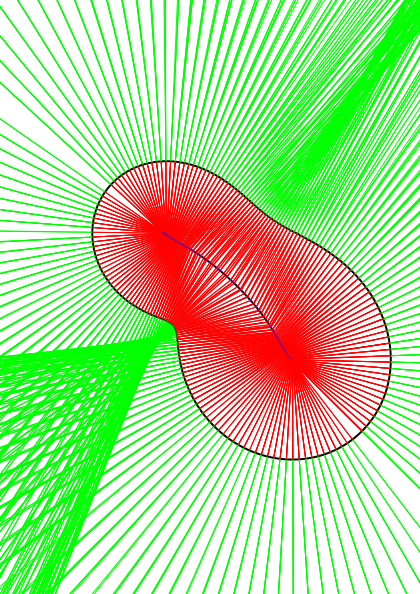

In [457]:
# Generate boundary
points = sample_biological_shape(**SHAPES["potato"]) # switch to the shape you want

# Compute medial axis and order it into a skeleton
medial = medial_axis(points, min_radius=25)  # min_radius: thickness of skeleton
medial = order_medial_points(medial)

# Create drawing canvas
create_canvas(420, 594)
background(255)
translate(width / 2, height / 2)

# Render shape layers
draw_boundary(points)
draw_skeleton(medial)
draw_radius_lines(medial, step=1, outward_length=400)

show()

As I mentioned, for ease of debugging, colours were set to red, green, blue, and black. As described in the **Concept and Background Research** section, the intention was to produce these drawings using a plotting machine. Therefore, colours in the exported SVG files were not a primary concern.

Below is an example demonstrating how the canvas was exported as an SVG file to a directory. Since the file was being overwritten each time, and I wanted to preserve multiple iterations, I added a timestamp to the filename using the datetime module.

In [458]:
from datetime import datetime

# Change this boolean depends on saving svg
is_save_allowed = True

# Get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Save with unique name
if is_save_allowed is True:
    save(current_datetime + "_biological_shape.svg")

## Reflection and Future Development

This project allowed me to explore the relationship between biological form, computational logic, and artistic decision-making. While not all aspects of the original plan were realised, the development process itself was valuable and informative.

My original plan was to produce physical prints using a plotting machine. However, due to limited access to the Hatchlab facilities during the break period, I was unable to use the machine as intended. Nevertheless, I am still planning to create physical prints using some of the python generated drawings from this code after submission.

The image (Figure 2) shows the visual style I was hoping to explore. I was particularly drawn to the multiplied effects created by overlapping lines. Since the aesthetic of my previous mid-term assessment involved solid, thick white marker on black paper, I wanted to experiment with a different approach—something more subtle, layered, and delicate.

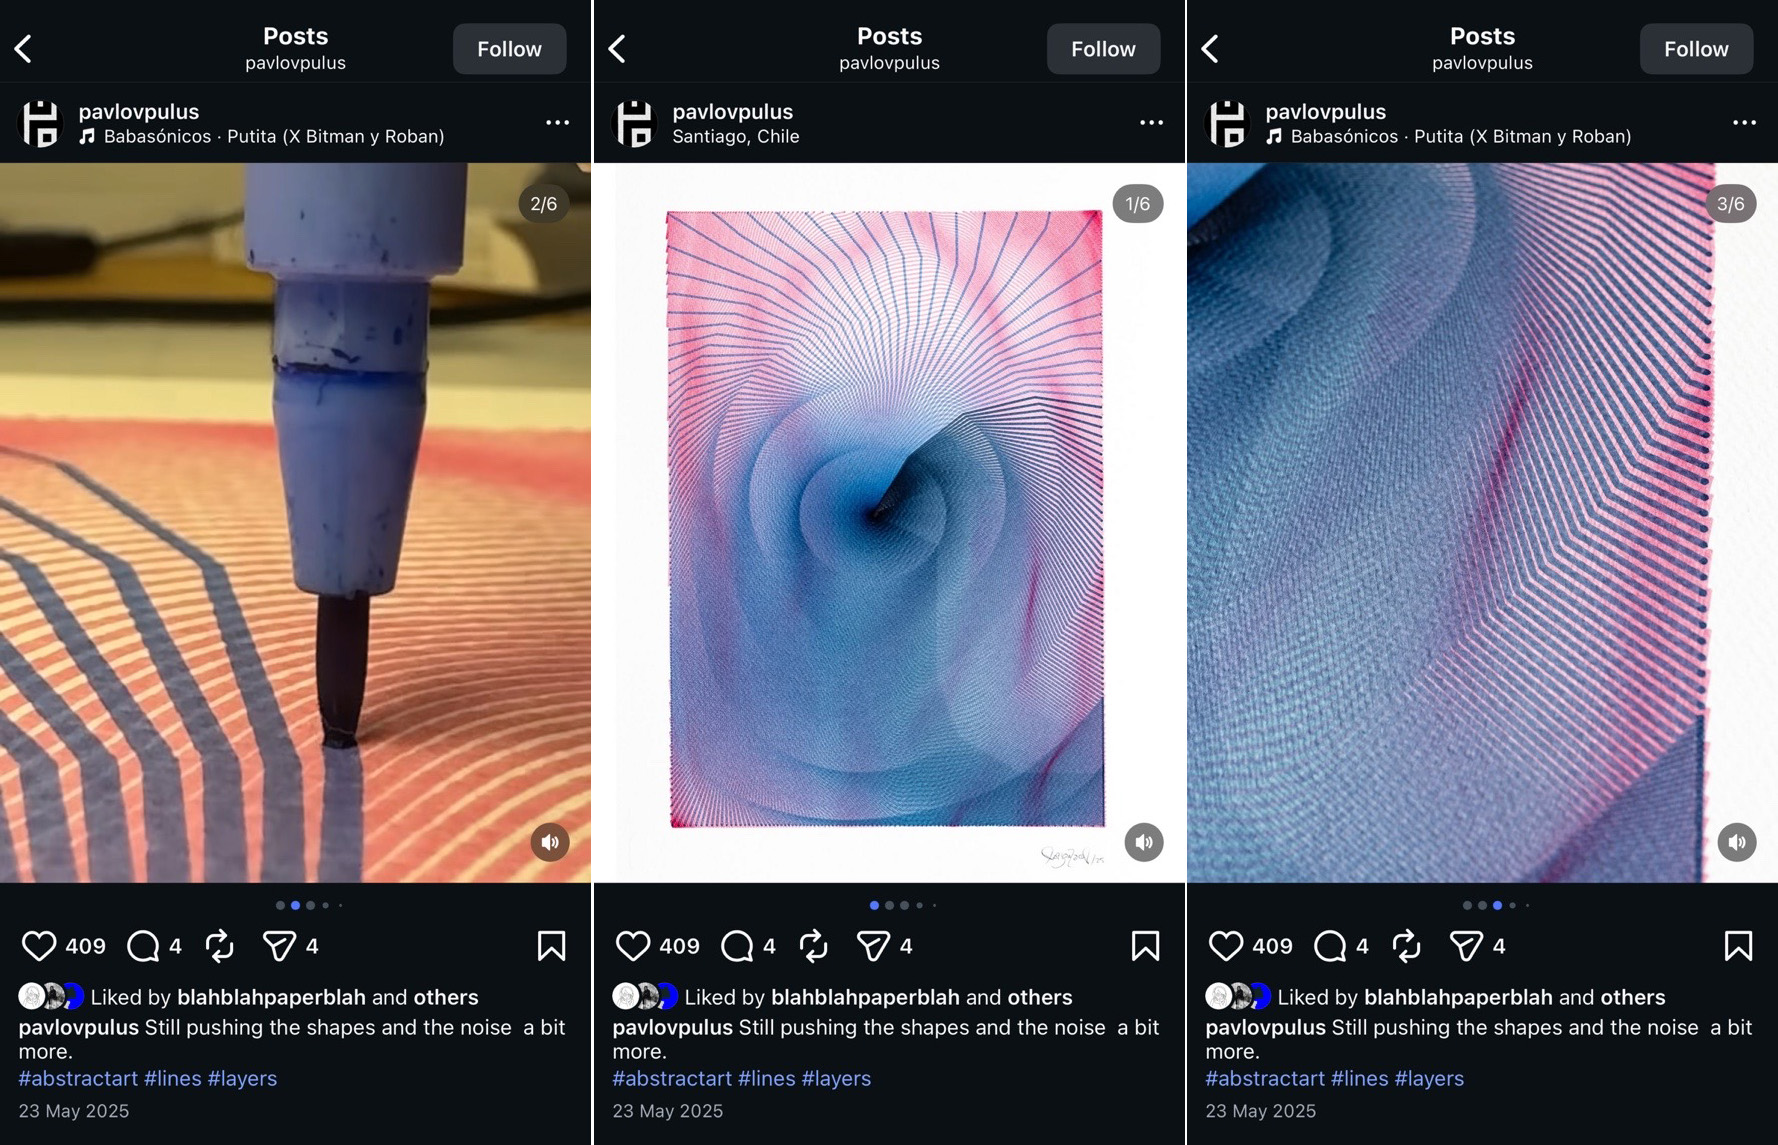
_Figure 2. Screenshots of instagram post (Pavlovpulus, 2025).

To support this direction, I purchased water-based brush pens from Tombow and tested them on fine grain paper to explore softer textures and layered effects.

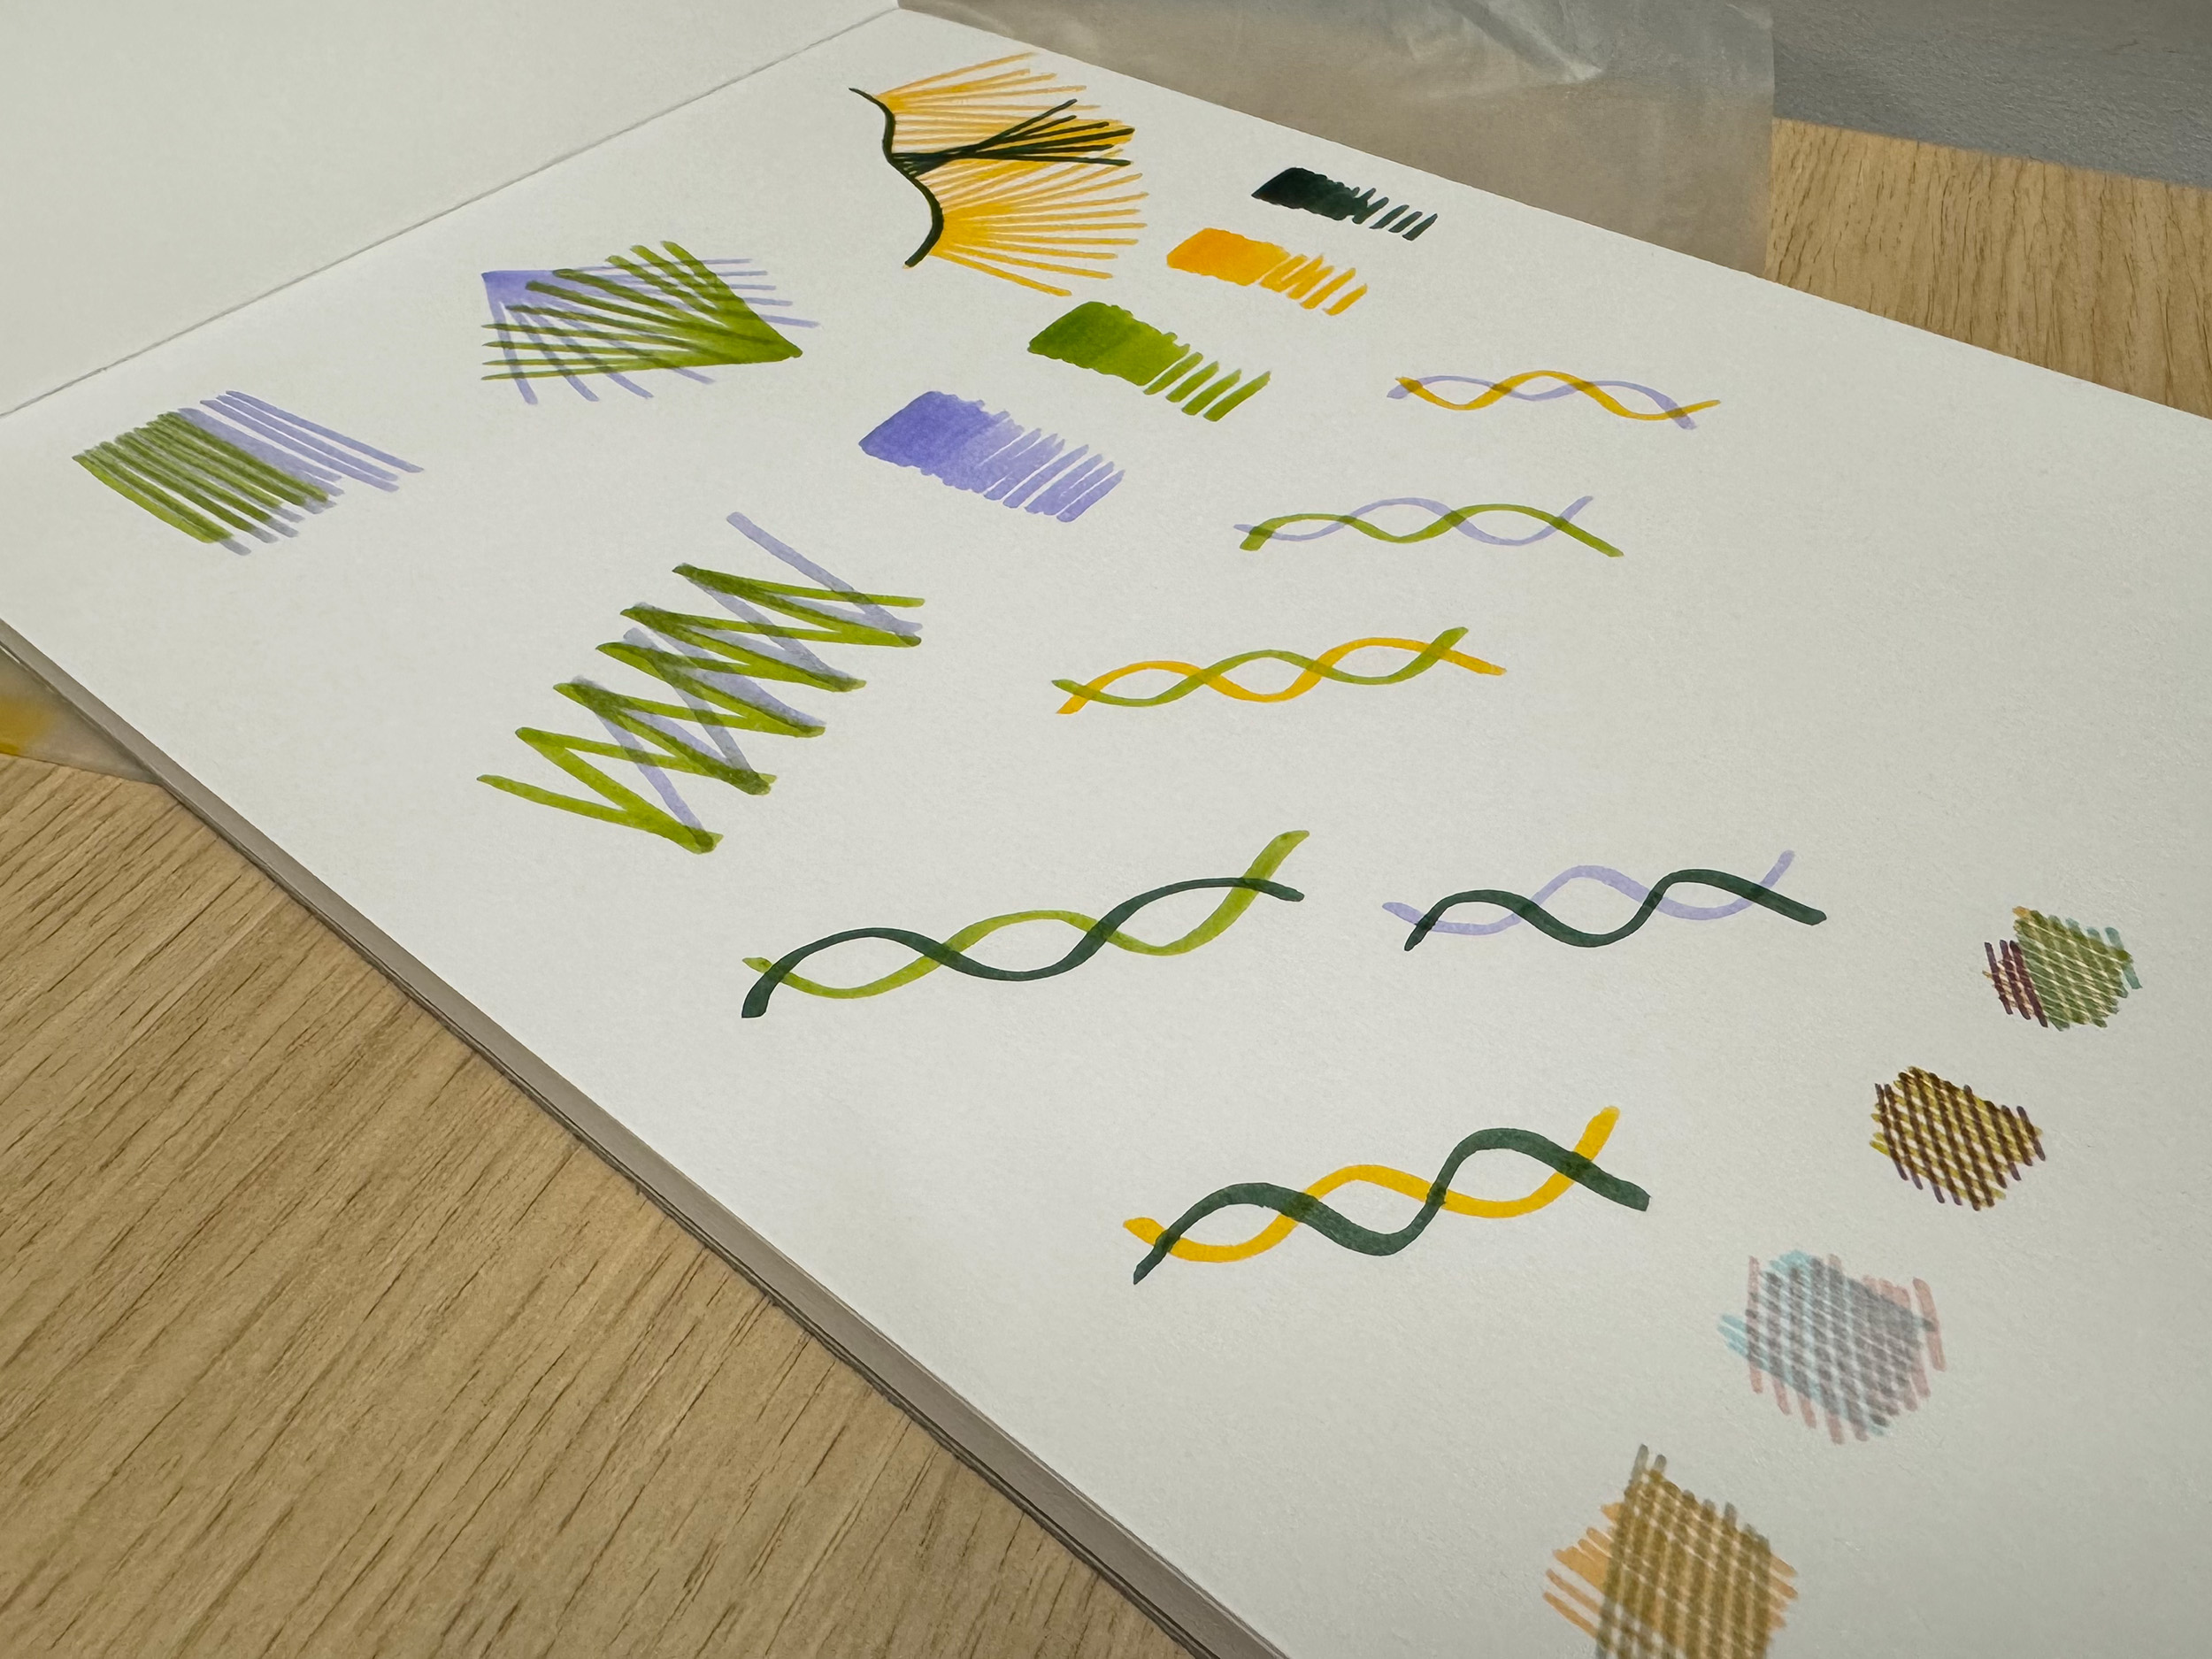
_Figure 3. Testing brush pens (Photo by author).

From a technical perspective, I initially hoped to generate boundary shapes and medial axes using Voronoi diagrams without relying on AI assistance. However, I found it almost impossible to implement the entire system independently within the given timeframe. I ultimately decided to use AI as a supportive tool, which enabled me to achieve the shapes I had in mind and to generate multiple variations through parameter control - decisions that remained entirely my own artistic choices. Importantly, I made an effort to understand the code generated by AI, checking official documentation, and study the underlying concepts alongside the implementation, which significantly supported my learning process.

Looking ahead, there are additional mathematical and computational concepts that could be explored related to the medial axis, including:
- Straight skeletons
- Medial axis
- Medial Surface

I also considered using the [Skeletonize](https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_skeleton.html) from _scikit-image_ to generate medial axes. However, due to my limited understanding of its implementation, I decided not to use it at this time.

## References 

Use the citation method recommended by your lecturer or that is standard in a field you are interested in. At the very least include both conceptual and technical references. If you have used anyone else’s code even if you have adapted it, you must cite it here or risk being penalized or disqualified for plagiarism! Make sure you cite your references in the text!

- Blum, H. (1973) ‘Biological shape and visual science (part I)’, _Journal of Theoretical Biology_, 38(2), pp. 205–287.

- Chang, Y.C., Saha, M., Prinz, F., Latombe, J.C. and Pinilla, J.M., 2004. _Medial axis transform assists path planning in configuration spaces with narrow passages._ IEEE.

- Fisher, R., Perkins, S., Walker, A. and Wolfart, E., _Morphology – Skeletonization/Medial Axis Transform, HIPR2,_ University of Edinburgh. Available at: https://homepages.inf.ed.ac.uk/rbf/HIPR2/skeleton.htm
 (Accessed: 3 January 2026)

- Fontana, C. & Cappetti, N., 2024. _A novel procedure for medial axis reconstruction of vessels from Medical Imaging segmentation._ Heliyon, 10(11), e31769. doi:10.1016/j.heliyon.2024.e31769. Available at: https://www.sciencedirect.com/science/article/pii/S2405844024078009
 (Accessed: 3 January 2026)

- Bridle, J. (2022) Ways of Being. Farrar, Straus and Giroux

- ScienceDirect (2025) _Medial Axis._ Available at: https://www.sciencedirect.com/topics/mathematics/medial-axis (Accessed: 23 December 2025).

- Pavlovpulus (2025). _Still pushing the shapes and the noise a bit more._ [Instagram]. 23 May. Available at: https://www.instagram.com/p/DJ-egvWRCVE/?igsh=OXBpcDVhM3N1c2U1 (Accessed: 20 December 2025)


#### Further Reading

- Blum H (1967). A transformation for extracting new descriptors of shape. _Models for the perception of speech and visual form,_ 19(5):362–380.

- TU Delft (2021) _The Medial Axis Transform: Lesson 4.2._ Available at: https://3d.bk.tudelft.nl/courses/backup/geo1004/2020/data/handout4.2.pdf
 (Accessed: 5 January 2026).

- D'arcy Wentworth Thompson, John Tyler Bonner and Stephen Jay Gould (1997) _On growth and form_. Cambridge: Cambridge University Press.
